### 閉ループ系制御設計
制御対象$P$に対して、以下の図に示す閉ループ系（フィードバック制御系）を構築することを目標とします。


![フィードバックシステムブロック](./fig/closed_feedback_control.png)

- $P$は制御対象
- $MPC$は制御システム
- $r$は目標値
- $u$は制御入力
- $d$は外乱
- $y$は出力
- $e$は偏差

目的：閉ループ系が望ましい特性になるように制御系$MPC$を設計します。

#### 安定性
閉ループ系では、外部から$r$と$d$が入力されます。そして出力は、制御対象の出力の$y$と制御入力の$u$です。

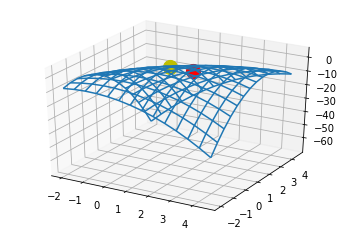

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.optimize import minimize

fig = plt.figure()
ax = fig.gca(projection='3d')

def func(x, sign=1.0):
    return sign*(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

def func_deriv(x, sign=1.0):
    dfdx0 = sign*(-2*x[0] + 2*x[1] + 2)
    dfdx1 = sign*(2*x[0] - 4*x[1])
    return np.array([dfdx0, dfdx1])

cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - 1]),
         'jac' : lambda x: np.array([0.0, 1.0])})

res1 = minimize(func, [-1.0, 1.0], args=(-1.0,), jac=func_deriv,
                  method='SLSQP')
res2 = minimize(func, [-1.0, 1.0], args=(-1.0,), jac=func_deriv,
                  constraints=cons, method='SLSQP')


x = np.arange(-2, 5, 0.5)
y = np.arange(-2, 5, 0.5)
xx, yy = np.meshgrid(x, y, sparse=True)
z = 2*xx*yy + 2*xx - xx**2 - 2*yy**2

ax.plot_wireframe(xx, yy, z)
ax.scatter(res1.x[0], res1.x[1], func(res2.x), s=200, c="r")
ax.scatter(res2.x[0], res2.x[1], func(res2.x), s=200, c="y")
# plt.show()